In [2]:
scripts_path = '../../scripts'
import sys
sys.path.append(scripts_path)

import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
os.getcwd()
import signal_processing as sp


109


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


trend_std для Stairs: 380.10892982730746 +- 76.3856369177742


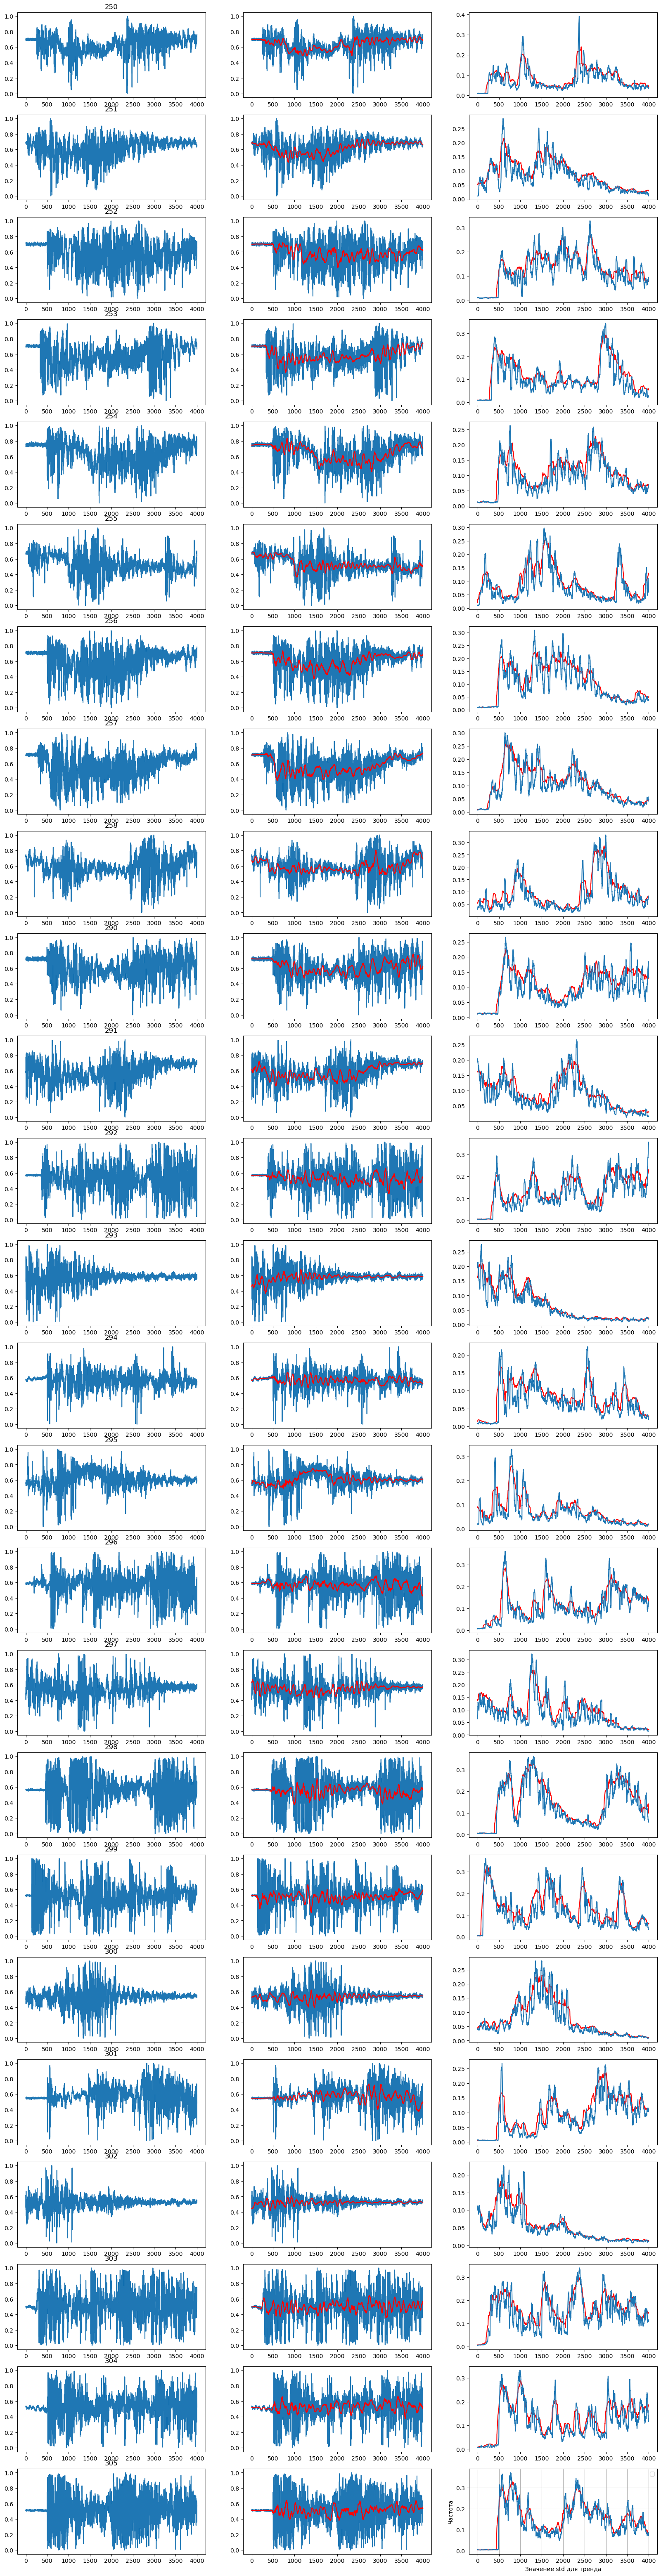

In [3]:
file_path = '../data/actual4_demostend.csv'
df = pd.read_csv(file_path, header = None)
# df = df.drop(index=[214, 216, 219, 226, 233, 237, 241, 243, 248, 250, 253, 254, 279, 400, 401, 402])
interaction = "Stairs"
df_interaction = df[df.iloc[:, -1] == interaction]
print(len(df_interaction))
indexes = range(0, 25)
fig, ax = plt.subplots(len(indexes), 3, figsize = (20,80))
std_trend = []
for i in indexes:
    signal = df_interaction.iloc[i, :-1]
    trend_signal = signal.rolling(window=32, min_periods=1, center=True).mean()
    # signal_fft = np.fft.fft(signal)
    # freq = np.fft.fftfreq(4000)
    name_in_raw_df = signal.name

    ax[i - indexes.start, 0].plot(sp.min_max(signal))
    ax[i - indexes.start, 0].set_title(name_in_raw_df)
    
    ax[i - indexes.start, 1].plot(sp.min_max(signal))
    ax[i - indexes.start, 1].plot(sp.rolling_mean(sp.min_max(signal), 64),color = 'red')
    
    ax[i - indexes.start, 2].plot(sp.moving_std(sp.min_max(signal), 128),color = 'red')
    ax[i - indexes.start, 2].plot(sp.moving_std(sp.min_max(signal), 32))
    
    

    # print('STD of raw {} signal = {}'.format(i, np.std(signal)))
    std_trend.append(np.std(trend_signal))
    #print('STD of trend {} signal = {}'.format(i, np.std(trend_signal)))
    # shapiro_statistic.append(shapiro(signal).statistic)
    # shapiro_pvalue.append(shapiro(signal).pvalue)
    
print('trend_std для {}: {} +- {}'.format(interaction, np.mean(std_trend), np.std(std_trend)))
# plt.hist(std_trend, bins=30, label = interaction)
plt.xlabel('Значение std для тренда')
plt.ylabel('Частота')
plt.legend()

plt.grid()

In [24]:
df

,0,1,2,3,4,5,6,7,8,9,...,3991,3992,3993,3994,3995,3996,3997,3998,3999,4000
0,6253.0,6225.0,6215.0,6181.0,6237.0,6244.0,6189.0,6259.0,6274.0,6330.0,...,6239.0,6281.0,6313.0,6259.0,6282.0,6312.0,6258.0,6207.0,6320.0,Saw
1,6212.0,6350.0,6257.0,6293.0,6236.0,6305.0,6278.0,6282.0,6268.0,6215.0,...,6291.0,6307.0,6285.0,6278.0,6244.0,6226.0,6252.0,6219.0,6245.0,Saw
2,6176.0,6225.0,6243.0,6257.0,6151.0,6262.0,6247.0,6198.0,6312.0,6277.0,...,6238.0,6261.0,6286.0,6253.0,6218.0,6257.0,6162.0,6189.0,6180.0,Hit
3,6237.0,6162.0,6263.0,6296.0,6264.0,6242.0,6264.0,6165.0,6200.0,6194.0,...,6247.0,6251.0,6228.0,6208.0,6263.0,6205.0,6303.0,6258.0,6193.0,Hit
4,5019.0,5034.0,5016.0,5020.0,4992.0,5070.0,5055.0,4967.0,5023.0,5033.0,...,4998.0,5066.0,5048.0,5030.0,4977.0,5034.0,5001.0,5073.0,5047.0,Saw
5,5022.0,4991.0,4989.0,5051.0,5077.0,5007.0,4977.0,5068.0,5017.0,5036.0,...,5095.0,5022.0,5055.0,5118.0,4994.0,5009.0,5009.0,5034.0,5012.0,Hit
6,5613.0,5745.0,5657.0,5673.0,5651.0,5682.0,5640.0,5703.0,5674.0,5631.0,...,5657.0,5591.0,5781.0,5691.0,5688.0,5663.0,5660.0,5682.0,5641.0,Saw
7,5725.0,5777.0,5688.0,5774.0,5793.0,5676.0,5750.0,5649.0,5757.0,5686.0,...,5701.0,5775.0,5767.0,5730.0,5782.0,5651.0,5757.0,5707.0,5720.0,Snack
8,5729.0,5738.0,5657.0,5788.0,5780.0,5691.0,5760.0,5683.0,5763.0,5740.0,...,6472.0,6682.0,6759.0,6758.0,6725.0,6699.0,6569.0,6692.0,6686.0,Stairs
9,5939.0,5930.0,5860.0,5850.0,5870.0,5903.0,5897.0,5887.0,5852.0,5935.0,...,6069.0,2546.0,6028.0,6029.0,6013.0,5160.0,6058.0,6005.0,5814.0,Stairs


In [14]:
# Приоритет ВЫСОКИЙ, использовать осторожно
# Сохранить измененный актуальный датасет
savepath = '../data/actual4_edit.csv'
df.to_csv(savepath, header = None, index = False)

In [76]:
actual_editted_csv_path = '../data/actual4_edit.csv'
df_editted = pd.read_csv(actual_editted_csv_path, header = None)
df_editted

,0,1,2,3,4,5,6,7,8,9,...,3991,3992,3993,3994,3995,3996,3997,3998,3999,4000
0,5372.0,5393.0,5407.0,5423.0,5404.0,5355.0,5329.0,5372.0,5397.0,5389.0,...,5294.0,5390.0,5232.0,5342.0,5322.0,5358.0,5359.0,5206.0,5279.0,Hit
1,5445.0,5539.0,5523.0,5463.0,5479.0,5501.0,5463.0,5413.0,5510.0,5496.0,...,5370.0,5347.0,5341.0,5381.0,5292.0,5299.0,5390.0,5335.0,5313.0,Hit
2,5307.0,5317.0,5339.0,5399.0,5396.0,5374.0,5360.0,5294.0,5374.0,5375.0,...,5508.0,5473.0,5525.0,5497.0,5422.0,5437.0,5522.0,5437.0,5473.0,Hit
3,5451.0,5416.0,5469.0,5430.0,5376.0,5393.0,5402.0,5406.0,5446.0,5374.0,...,5481.0,5375.0,5422.0,5448.0,5420.0,5446.0,5400.0,5457.0,5365.0,Hit
4,5491.0,5456.0,5473.0,5476.0,5471.0,5451.0,5513.0,5479.0,5451.0,5462.0,...,5437.0,5392.0,5406.0,5385.0,5401.0,5466.0,5332.0,5390.0,5397.0,Hit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,6328.0,6353.0,6315.0,6289.0,6240.0,6316.0,6306.0,6256.0,6252.0,6220.0,...,6334.0,6249.0,6249.0,6273.0,6295.0,6251.0,6260.0,6274.0,6290.0,Snack
408,6239.0,6265.0,6249.0,6248.0,6276.0,6378.0,6296.0,6315.0,6324.0,6235.0,...,6292.0,6287.0,6257.0,6280.0,6272.0,6269.0,6314.0,6308.0,6176.0,Hit
409,6359.0,6177.0,6297.0,6250.0,6323.0,6265.0,6291.0,6250.0,6330.0,6338.0,...,6235.0,6257.0,6265.0,6307.0,6272.0,6273.0,6246.0,6345.0,6305.0,Hit
410,6322.0,6277.0,6255.0,6276.0,6286.0,6340.0,6359.0,6286.0,6269.0,6253.0,...,6312.0,6261.0,6353.0,6278.0,6324.0,6356.0,6271.0,6228.0,6311.0,Hit


In [79]:
temppath = '../data/temp4.csv'
df_temp = pd.read_csv(temppath, header = None)
df_temp

,0,1,2,3,4,5,6,7,8,9,...,3991,3992,3993,3994,3995,3996,3997,3998,3999,4000
0,7133.0,7127.0,7134.0,7064.0,7293.0,7218.0,7282.0,7213.0,7186.0,7054.0,...,7352.0,7331.0,7362.0,7361.0,7351.0,7394.0,7375.0,7326.0,7403.0,Snack
1,7427.0,7362.0,7349.0,7391.0,7409.0,7321.0,7235.0,7388.0,7319.0,7343.0,...,7357.0,7326.0,7369.0,7308.0,7355.0,7414.0,7349.0,7334.0,7333.0,Snack
2,7362.0,7313.0,7357.0,7338.0,7343.0,7340.0,7364.0,7340.0,7322.0,7354.0,...,7417.0,7409.0,7381.0,7336.0,7319.0,7395.0,7332.0,7384.0,7316.0,Snack
3,7338.0,7317.0,7306.0,7332.0,7419.0,7368.0,7329.0,7360.0,7411.0,7440.0,...,7370.0,7387.0,7399.0,7318.0,7331.0,7330.0,7318.0,7351.0,7341.0,Snack
4,7390.0,7349.0,7311.0,7318.0,7271.0,7320.0,7336.0,7413.0,7339.0,7398.0,...,7336.0,7360.0,7431.0,7335.0,7331.0,7429.0,7380.0,7379.0,7321.0,Snack
5,7332.0,7368.0,7311.0,7385.0,7355.0,7342.0,7385.0,7369.0,7387.0,7431.0,...,7437.0,7380.0,7437.0,7359.0,7379.0,7421.0,7412.0,7358.0,7369.0,Snack
6,7319.0,7378.0,7333.0,7336.0,7409.0,7342.0,7355.0,7392.0,7352.0,7305.0,...,7309.0,7383.0,7423.0,7412.0,7370.0,7348.0,7310.0,7327.0,7454.0,Snack
7,7035.0,5483.0,7166.0,6698.0,5817.0,7361.0,7318.0,6931.0,7148.0,6761.0,...,7404.0,7340.0,7365.0,7409.0,7283.0,7397.0,7335.0,7321.0,7452.0,Snack
8,7375.0,7392.0,7332.0,7342.0,7434.0,7317.0,7302.0,7318.0,7430.0,7347.0,...,7397.0,7344.0,7362.0,7390.0,7373.0,7290.0,7313.0,7359.0,7362.0,Snack
9,7337.0,7313.0,7341.0,7375.0,7339.0,7398.0,7382.0,7372.0,7404.0,7437.0,...,7351.0,7347.0,7353.0,7366.0,7383.0,7372.0,7311.0,7413.0,7353.0,Snack


In [80]:
df_concated = pd.concat([df_editted, df_temp]).reset_index(drop = True)
print(df_concated.iloc[:, -1].value_counts())
df_concated

4000
Hit       109
Saw       109
Snack     109
Stairs    109
Name: count, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,3991,3992,3993,3994,3995,3996,3997,3998,3999,4000
0,5372.0,5393.0,5407.0,5423.0,5404.0,5355.0,5329.0,5372.0,5397.0,5389.0,...,5294.0,5390.0,5232.0,5342.0,5322.0,5358.0,5359.0,5206.0,5279.0,Hit
1,5445.0,5539.0,5523.0,5463.0,5479.0,5501.0,5463.0,5413.0,5510.0,5496.0,...,5370.0,5347.0,5341.0,5381.0,5292.0,5299.0,5390.0,5335.0,5313.0,Hit
2,5307.0,5317.0,5339.0,5399.0,5396.0,5374.0,5360.0,5294.0,5374.0,5375.0,...,5508.0,5473.0,5525.0,5497.0,5422.0,5437.0,5522.0,5437.0,5473.0,Hit
3,5451.0,5416.0,5469.0,5430.0,5376.0,5393.0,5402.0,5406.0,5446.0,5374.0,...,5481.0,5375.0,5422.0,5448.0,5420.0,5446.0,5400.0,5457.0,5365.0,Hit
4,5491.0,5456.0,5473.0,5476.0,5471.0,5451.0,5513.0,5479.0,5451.0,5462.0,...,5437.0,5392.0,5406.0,5385.0,5401.0,5466.0,5332.0,5390.0,5397.0,Hit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,7335.0,7459.0,7367.0,7345.0,7425.0,7405.0,7342.0,7440.0,7316.0,7447.0,...,7408.0,7371.0,7400.0,7357.0,7426.0,7344.0,7408.0,7492.0,7386.0,Saw
432,7363.0,7398.0,7390.0,7301.0,7367.0,7384.0,7348.0,7412.0,7375.0,7433.0,...,7475.0,7413.0,7366.0,7332.0,7467.0,7426.0,7391.0,7400.0,7399.0,Saw
433,7343.0,7422.0,7331.0,7400.0,7419.0,7423.0,7411.0,7391.0,7426.0,7401.0,...,7307.0,7349.0,7387.0,7364.0,7354.0,7441.0,7373.0,7373.0,7433.0,Saw
434,7373.0,7420.0,7371.0,7405.0,7398.0,7442.0,7369.0,7410.0,7377.0,7339.0,...,7369.0,7410.0,7383.0,7379.0,7416.0,7376.0,7445.0,7385.0,7410.0,Hit


In [81]:
# Сохранить слитый actual с temp
df_concated.to_csv('actual4_edit.csv', header= None, index= False)

In [82]:
pd.read_csv('../data/actual4_edit.csv',header=None)

,0,1,2,3,4,5,6,7,8,9,...,3991,3992,3993,3994,3995,3996,3997,3998,3999,4000
0,5372.0,5393.0,5407.0,5423.0,5404.0,5355.0,5329.0,5372.0,5397.0,5389.0,...,5294.0,5390.0,5232.0,5342.0,5322.0,5358.0,5359.0,5206.0,5279.0,Hit
1,5445.0,5539.0,5523.0,5463.0,5479.0,5501.0,5463.0,5413.0,5510.0,5496.0,...,5370.0,5347.0,5341.0,5381.0,5292.0,5299.0,5390.0,5335.0,5313.0,Hit
2,5307.0,5317.0,5339.0,5399.0,5396.0,5374.0,5360.0,5294.0,5374.0,5375.0,...,5508.0,5473.0,5525.0,5497.0,5422.0,5437.0,5522.0,5437.0,5473.0,Hit
3,5451.0,5416.0,5469.0,5430.0,5376.0,5393.0,5402.0,5406.0,5446.0,5374.0,...,5481.0,5375.0,5422.0,5448.0,5420.0,5446.0,5400.0,5457.0,5365.0,Hit
4,5491.0,5456.0,5473.0,5476.0,5471.0,5451.0,5513.0,5479.0,5451.0,5462.0,...,5437.0,5392.0,5406.0,5385.0,5401.0,5466.0,5332.0,5390.0,5397.0,Hit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,7335.0,7459.0,7367.0,7345.0,7425.0,7405.0,7342.0,7440.0,7316.0,7447.0,...,7408.0,7371.0,7400.0,7357.0,7426.0,7344.0,7408.0,7492.0,7386.0,Saw
432,7363.0,7398.0,7390.0,7301.0,7367.0,7384.0,7348.0,7412.0,7375.0,7433.0,...,7475.0,7413.0,7366.0,7332.0,7467.0,7426.0,7391.0,7400.0,7399.0,Saw
433,7343.0,7422.0,7331.0,7400.0,7419.0,7423.0,7411.0,7391.0,7426.0,7401.0,...,7307.0,7349.0,7387.0,7364.0,7354.0,7441.0,7373.0,7373.0,7433.0,Saw
434,7373.0,7420.0,7371.0,7405.0,7398.0,7442.0,7369.0,7410.0,7377.0,7339.0,...,7369.0,7410.0,7383.0,7379.0,7416.0,7376.0,7445.0,7385.0,7410.0,Hit
